In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from textblob import TextBlob

In [3]:
trump = pd.read_csv("dataset/Trumpall2.csv")
trump.head()

,user,text
0,manny_rosen,@sanofi please tell us how many shares the Cr...
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P..."
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...
4,James09254677,After 4 years you think you would have figure...


In [4]:
biden= pd.read_csv("dataset/Bidenall2.csv")
biden.head()

,user,text
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...
2,OldlaceA,@JoeBiden So did Lying Barr
3,penblogger,@JoeBiden It's clear you didnt compose this tw...
4,Aquarian0264,@JoeBiden I will vote in person thank you.


In [5]:
tb1 = TextBlob(trump["text"][10])
print("Donald Trump :",tb1.sentiment)

Donald Trump : Sentiment(polarity=0.15, subjectivity=0.3125)


In [6]:
tb2 = TextBlob(biden["text"][500])
print("Joe Biden :",tb2.sentiment)

Joe Biden : Sentiment(polarity=0.6, subjectivity=0.9)


In [7]:
def findPoll(review):
    return TextBlob(review).sentiment.polarity

In [8]:
trump["Sentiment Polarity"] = trump["text"].apply(findPoll)
print(trump.head())

              user                                               text  \
0      manny_rosen   @sanofi please tell us how many shares the Cr...   
1        osi_abdul   https://t.co/atM98CpqF7  Like, comment, RT #P...   
2          Patsyrw   Your AG Barr is as useless &amp; corrupt as y...   
3  seyedebrahimi_m   Mr. Trump! Wake Up!  Most of the comments bel...   
4    James09254677   After 4 years you think you would have figure...   

   Sentiment Polarity  
0                0.05  
1                0.00  
2               -0.50  
3                0.50  
4                0.00  


In [9]:
biden["Sentiment Polarity"] = biden["text"].apply(findPoll)
print(biden.head())

           user                                               text  \
0   MarkHodder3    @JoeBiden And we’ll find out who won in 2026...   
1    K87327961G  @JoeBiden Your Democratic Nazi Party cannot be...   
2      OldlaceA                        @JoeBiden So did Lying Barr   
3    penblogger  @JoeBiden It's clear you didnt compose this tw...   
4  Aquarian0264         @JoeBiden I will vote in person thank you.   

   Sentiment Polarity  
0                0.00  
1                0.00  
2                0.00  
3                0.05  
4                0.00  


In [10]:
trump["Opinion Label"] = np.where(trump["Sentiment Polarity"]>0, "positive", "negative")
trump["Opinion Label"][trump["Sentiment Polarity"]==0]="Neutral"
print(trump.head())

              user                                               text  \
0      manny_rosen   @sanofi please tell us how many shares the Cr...   
1        osi_abdul   https://t.co/atM98CpqF7  Like, comment, RT #P...   
2          Patsyrw   Your AG Barr is as useless &amp; corrupt as y...   
3  seyedebrahimi_m   Mr. Trump! Wake Up!  Most of the comments bel...   
4    James09254677   After 4 years you think you would have figure...   

   Sentiment Polarity Opinion Label  
0                0.05      positive  
1                0.00       Neutral  
2               -0.50      negative  
3                0.50      positive  
4                0.00       Neutral  


In [11]:
biden["Opinion Label"] = np.where(biden["Sentiment Polarity"]>0, "positive", "negative")
biden["Opinion Label"][trump["Sentiment Polarity"]==0]="Neutral"
print(biden.head())

           user                                               text  \
0   MarkHodder3    @JoeBiden And we’ll find out who won in 2026...   
1    K87327961G  @JoeBiden Your Democratic Nazi Party cannot be...   
2      OldlaceA                        @JoeBiden So did Lying Barr   
3    penblogger  @JoeBiden It's clear you didnt compose this tw...   
4  Aquarian0264         @JoeBiden I will vote in person thank you.   

   Sentiment Polarity Opinion Label  
0                0.00      negative  
1                0.00       Neutral  
2                0.00      negative  
3                0.05      positive  
4                0.00       Neutral  


In [12]:
reviews1 = trump[trump['Sentiment Polarity'] == 0.0000]
cond1=trump['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
trump.drop(trump[cond1].index, inplace = True)
print(trump.shape)

(1324, 4)


In [13]:
reviews2 = biden[biden['Sentiment Polarity'] == 0.0000]
cond2=biden['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
biden.drop(biden[cond2].index, inplace = True)
print(biden.shape)

(1031, 4)


In [14]:
np.random.seed(10)
remove=324
dropIndices = np.random.choice(trump.index, remove, replace=False)
df_trump = trump.drop(dropIndices)
print("Shape of trump Subset :",df_trump.shape)
np.random.seed(10)
remove =31
dropIndices = np.random.choice(biden.index, remove, replace=False)
df_biden = biden.drop(dropIndices)
print("Shape of Biden Subset :",df_biden.shape)

Shape of trump Subset : (1000, 4)
Shape of Biden Subset : (1000, 4)


In [15]:
count_Trump = df_trump.groupby('Opinion Label').count()
negative_percentage1 = (count_Trump['Sentiment Polarity'][0]/1000)*10
positive_percentage1 = (count_Trump['Sentiment Polarity'][1]/1000)*100

In [16]:
count_Biden = df_biden.groupby('Opinion Label').count()
negative_percentage2 = (count_Biden['Sentiment Polarity'][0]/1000)*10
positive_percentage2 = (count_Biden['Sentiment Polarity'][1]/1000)*100

In [17]:
Politicians = ['Joe Biden', 'Donald Trump']
lis_pos = [positive_percentage1, positive_percentage2]
lis_neg = [negative_percentage1, negative_percentage2]

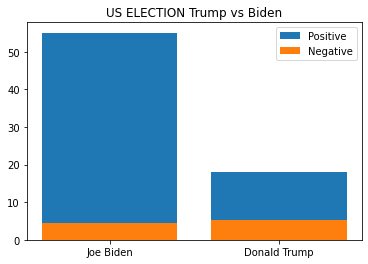

In [18]:
plt.bar(x=Politicians,height=lis_pos,label="Positive")
plt.bar(x=Politicians,height=lis_neg,label="Negative")
plt.legend()
plt.title("US ELECTION Trump vs Biden")
plt.show()